# IMPLEMENTATION OF COVID UNCERTAINTY MODEL

## Base scenario
The situation with small ranges based in actual situation and litertaure predictions

In [43]:

#import matplotlib.pyplot as plt
#import seaborn as sns
#import numpy as np
#import pandas as pd

# EMA packages 
from ema_workbench import (
    RealParameter,
    TimeSeriesOutcome,
    ema_logging,
    perform_experiments,
    MultiprocessingEvaluator,   
)

from ema_workbench.connectors.vensim import VensimModel, LookupUncertainty


from ema_workbench import ema_logging
if __name__ == "__main__":
    ema_logging.log_to_stderr(ema_logging.INFO)
    
    #model = VensimModel('CovidModel', wd=r"./model", model_file=r"Final_model_v3.vpmx")
    #model = VensimModel('CovidModel', wd=r"./model", model_file=r"EXPORT_MODEL.vpmx")
    
    model = VensimModel('CovidModel', wd=r"./model", model_file=r"0608_025_EXPORT_Loaction.vpmx")
    
    
    #model = VensimModel('CovidModelv2', wd=r"./models", model_file=r"Final_model_v1.vpmx")
    #model = VensimModel('CovidModel', wd=r"./model", model_file=r"Export_Covid_model.vpmx")
    
    
    #outcomes
    model.outcomes= [
        #Total movements
        TimeSeriesOutcome("Total car movements per month"),
        TimeSeriesOutcome("Total Public Transport movements per month"),
        TimeSeriesOutcome("Total bicycle movements per month"),
        TimeSeriesOutcome("Total Telecommuting movements per month"),
        TimeSeriesOutcome("Total walking movements per month"),
        
        #Total Modal split
        TimeSeriesOutcome("Total Modal split car"),
        TimeSeriesOutcome("Total Modal split PT"),
        TimeSeriesOutcome("Total Modal split Bicycle"),
        TimeSeriesOutcome("Total Modal split telecommuting"),
        TimeSeriesOutcome("Total Modal split Walking"),
        
        #movements
        TimeSeriesOutcome("Monthly car movements per motive[commuting]"),
        TimeSeriesOutcome("Monthly car movements per motive[educational]"),
        TimeSeriesOutcome("Monthly car movements per motive[recreational]"),
        TimeSeriesOutcome("Monthly car movements per motive[shopping personal care]"),
        TimeSeriesOutcome("Monthly car movements per motive[other motive]"),
        
        
        TimeSeriesOutcome("Monthly car movements per motive and distance class[commuting, short trips]"),
        TimeSeriesOutcome("Monthly car movements[commuting, short trips, Very highly urban]"),
        
        
        #modal split
        TimeSeriesOutcome("Modal split Bicycle[commuting, short trips, Very highly urban]"),
        TimeSeriesOutcome("Modal split Car[commuting, short trips, Very highly urban]"),
        TimeSeriesOutcome("Modal split Telecommuting[commuting, short trips, Very highly urban]"),
        TimeSeriesOutcome("Modal split Public transport[commuting, short trips, Very highly urban]"),
        TimeSeriesOutcome("Modal split walking[commuting, short trips, Very highly urban]"),
        
        TimeSeriesOutcome("Modal split Bicycle[commuting, short trips, none urban]"),
        TimeSeriesOutcome("Modal split Car[commuting, short trips, none urban]"),
        TimeSeriesOutcome("Modal split Telecommuting[commuting, short trips, none urban]"),
        TimeSeriesOutcome("Modal split Public transport[commuting, short trips, none urban]"),
        TimeSeriesOutcome("Modal split walking[commuting, short trips, none urban]"),
        
      
        
        
        #define the kpis we want 
       
        
        #TimeSeriesOutcome('Accessibility to jobs per district type[City center]'),

        #TimeSeriesOutcome("Modal split Car[educational]"),
        #TimeSeriesOutcome("Modal split Public transport[recreational]"),
        #TimeSeriesOutcome("Modal split Bicycle"),
        #TimeSeriesOutcome("Modal split Telecommuting"),
        #TimeSeriesOutcome("Modal split walking"),
        
        TimeSeriesOutcome("Ratio car"),
        TimeSeriesOutcome("Ratio public transport"),
        
        #car kpis
        TimeSeriesOutcome("CO2 emission car"),
        TimeSeriesOutcome("Total road intensity"),
        TimeSeriesOutcome("Congestion level"),
        TimeSeriesOutcome("Car ownership"),
        
        TimeSeriesOutcome("Road intensity[short trips]"),
        TimeSeriesOutcome("Road intensity[middleshort trips]"),
        TimeSeriesOutcome("Road intensity[middlelong trips]"),
        TimeSeriesOutcome("Road intensity[long trips]"),
       

        #Pt
        TimeSeriesOutcome("Number of transit traveller per day"),
        
        
        
        #Telecommuting
        TimeSeriesOutcome("Number of Telecommuters per year"),
        TimeSeriesOutcome("Willigness to telecommute"),   
    
        # Lcation
        TimeSeriesOutcome("Attactiveness region[Very highly urban]"),
        TimeSeriesOutcome("Attactiveness region[highly urban]"),
        TimeSeriesOutcome("Attactiveness region[moderately urban]"),
        TimeSeriesOutcome("Attactiveness region[little urban]"),
        TimeSeriesOutcome("Attactiveness region[none urban]"),    
    ]
        
    
    
    
    
    #parameter uncertainties
    model.uncertainties = [
        #OLD
        #RealParameter("Increase fuel cost Internal combustion engines",0,1),
        #RealParameter('Kilometer tax',0 , 0.3),

        
        #Global uncertainty
        ######### DO NOT CHANGE THE INITIAL UTILITIES #######
        
    #Car
        #RealParameter("Increase fuel cost Internal combustion engines",0,1),
        #LookupParameters
        #LookupUncertainty( "Increase fuel cost Internal combustion engines", VensimModel,  0, 1),
        #RealParameter("Increase electricity/fuel cost Electric vehicles"),
        #RealParameter("Other variable car cost"),
        #RealParameter('Distribution Electric vehicles (EV)',0.1,0.6),
                #RealParameter("Kilometer tax", 0, 4), DONT change from start
        #RealParameter("Fixed travel cost per km", 0, 2),
        #RealParameter("CO2 emission per vehicle km"),

    #PT
        #RealParameter("Capacity PT"),
        #RealParameter("Public transport ticket price Subsidy"),
        #RealParameter("KM price public transport", 0 , 0.5),
        #RealParameter("Fixed travel cost PT"),

        #RealParameter("Estimated Population growth",),

    #COVID uncertainties
        
    #tele

        RealParameter("Natural decay without pandemic", 0.05 ,0.15), # base 0.1
        RealParameter("Expected telecommuting", 0.15 ,0.25), # base 0.2
        
    #PT attitude 
        RealParameter("Perception public transport rate of gaining back trust", 0.1, 0.3),
        #RealParameter("Comfort paramter Public Transport[short trips]", 1, 8), #base 5
        #RealParameter("Comfort paramter Public Transport[middleshort trips]", 1, 8), #base 3 
        #RealParameter("Comfort paramter Public Transport[middlelong trips]", 1, 8), #base 1
        #RealParameter("Comfort paramter Public Transport[long trips]", 1, 8), #base 0.5
        
    #COVID (on movements)
        #RealParameter('Decay rates of movements in COVID waves[recreational]', 0.1 , 0.3)   # 0.1,0.4
            #RealParameter("Movements in 2nd,...,N COVID waves[recreational]" , 0.6, 0.9),     #OLD model var
            #RealParameter("Movements without COVID", 0.8, 1),    #OLD model var
        
        #RealParameter("Decay rate first Wave"),
        #RealParameter("Last COVID Wave",2022,2025),
    ]
                      
                      

In [40]:
#Experiment test

results = perform_experiments(model, 5)



[MainProcess/INFO] performing 5 scenarios * 1 policies * 1 model(s) = 5 experiments
100%|████████████████████████████████████████████| 5/5 [00:14<00:00,  2.93s/it]
[MainProcess/INFO] experiments finished


# Test graphs with new model export 
- subs werken nu

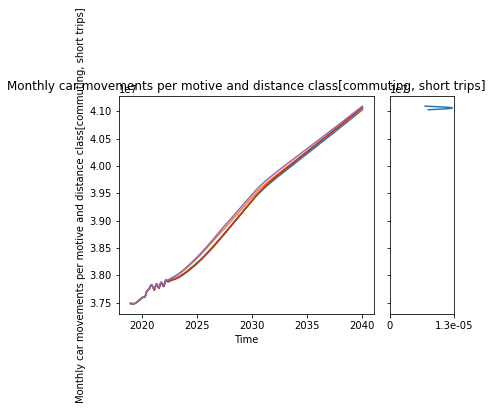

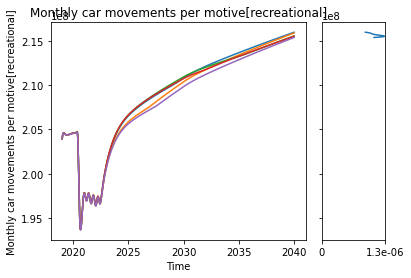

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench.analysis.plotting import lines, Density,kde_over_time, envelopes, multiple_densities



figure = lines(experiments, outcomes,outcomes_to_show = "Monthly car movements per motive and distance class[commuting, short trips]" , density =Density.KDE) #show lines, and end state density
plt.show() #show figure
figure = lines(experiments, outcomes,outcomes_to_show = "Monthly car movements per motive[recreational]" , density =Density.KDE) #show lines, and end state density
plt.show() #show figure

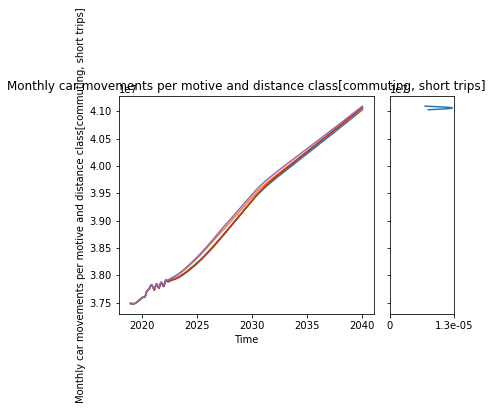

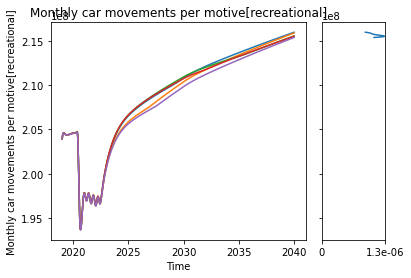

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench.analysis.plotting import lines, Density,kde_over_time, envelopes, multiple_densities



figure = lines(experiments, outcomes,outcomes_to_show = "Monthly car movements per motive and distance class[commuting, short trips]" , density =Density.KDE) #show lines, and end state density
plt.show() #show figure
figure = lines(experiments, outcomes,outcomes_to_show = "Monthly car movements per motive[recreational]" , density =Density.KDE) #show lines, and end state density
plt.show() #show figure


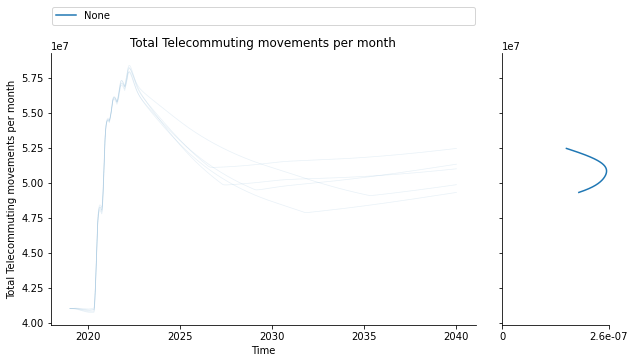

In [30]:
# Test from thesis


from ema_workbench.analysis.plotting import lines, Density,kde_over_time, envelopes, multiple_densities

fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total Telecommuting movements per month', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()

## Perform experiments

### Experiments for STEP1: results

Save the results for later 

In [44]:
# in serie experimenten uitvoeren (SEQUENTIAL)




results = perform_experiments(model, 1000, reporting_frequency=100)

#save_results
from ema_workbench import save_results
save_results(results, r'./results/0608_1000_final_mdl.tar.gz')


[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments



  0%|                                                 | 0/1000 [00:00<?, ?it/s][MainProcess/INFO] performing experiments sequentially



  0%|                                       | 1/1000 [00:04<1:12:38,  4.36s/it]


  0%|                                         | 2/1000 [00:06<54:14,  3.26s/it]


  0%|                                         | 3/1000 [00:09<53:09,  3.20s/it]


  0%|▏                                        | 4/1000 [00:12<49:26,  2.98s/it]


  0%|▏                                        | 5/1000 [00:15<46:20,  2.79s/it]


  1%|▏                                        | 6/1000 [00:17<44:54,  2.71s/it]


  1%|▎                                        | 7/1000 [00:20<44:11,  2.67s/it]


  1%|▎                                        | 8/1000 [00:23<45:06,  2.73s/it]


  1%|▎                                        | 9/1000 [00:25<44:03,  2.67s/it]


  1%|▍                          

  9%|███▎                                  | 88/1000 [1:33:57<41:02,  2.70s/it]


  9%|███▍                                  | 89/1000 [1:34:00<41:34,  2.74s/it]


  9%|███▍                                  | 90/1000 [1:34:03<40:49,  2.69s/it]


  9%|███▍                                  | 91/1000 [1:34:05<38:59,  2.57s/it]


  9%|███▍                                  | 92/1000 [1:34:08<38:40,  2.56s/it]


  9%|███▌                                  | 93/1000 [1:34:10<38:56,  2.58s/it]


  9%|███▌                                  | 94/1000 [1:34:13<37:32,  2.49s/it]


 10%|███▌                                  | 95/1000 [1:34:15<36:33,  2.42s/it]


 10%|███▋                                  | 96/1000 [1:34:17<36:12,  2.40s/it]


 10%|███▋                                  | 97/1000 [1:34:19<35:35,  2.37s/it]


 10%|███▋                                  | 98/1000 [1:34:22<35:06,  2.34s/it]


 10%|███▊                                  | 99/1000 [1:34:24<34:46,  2.32s/it]


 10%|███▋       

 18%|██████▌                              | 178/1000 [1:37:45<43:43,  3.19s/it]


 18%|██████▌                              | 179/1000 [1:37:48<41:00,  3.00s/it]


 18%|██████▋                              | 180/1000 [1:37:50<38:38,  2.83s/it]


 18%|██████▋                              | 181/1000 [1:37:53<37:33,  2.75s/it]


 18%|██████▋                              | 182/1000 [1:37:55<36:31,  2.68s/it]


 18%|██████▊                              | 183/1000 [1:37:58<37:05,  2.72s/it]


 18%|██████▊                              | 184/1000 [1:38:01<37:55,  2.79s/it]


 18%|██████▊                              | 185/1000 [1:38:04<36:35,  2.69s/it]


 19%|██████▉                              | 186/1000 [1:38:06<35:37,  2.63s/it]


 19%|██████▉                              | 187/1000 [1:38:09<35:13,  2.60s/it]


 19%|██████▉                              | 188/1000 [1:38:11<34:56,  2.58s/it]


 19%|██████▉                              | 189/1000 [1:38:13<34:03,  2.52s/it]


 19%|███████    

 27%|█████████▉                           | 268/1000 [1:41:18<28:18,  2.32s/it]


 27%|█████████▉                           | 269/1000 [1:41:20<28:12,  2.32s/it]


 27%|█████████▉                           | 270/1000 [1:41:22<28:03,  2.31s/it]


 27%|██████████                           | 271/1000 [1:41:25<28:04,  2.31s/it]


 27%|██████████                           | 272/1000 [1:41:27<28:17,  2.33s/it]


 27%|██████████                           | 273/1000 [1:41:29<28:29,  2.35s/it]


 27%|██████████▏                          | 274/1000 [1:41:32<28:23,  2.35s/it]


 28%|██████████▏                          | 275/1000 [1:41:34<28:09,  2.33s/it]


 28%|██████████▏                          | 276/1000 [1:41:37<29:12,  2.42s/it]


 28%|██████████▏                          | 277/1000 [1:41:39<29:09,  2.42s/it]


 28%|██████████▎                          | 278/1000 [1:41:41<28:44,  2.39s/it]


 28%|██████████▎                          | 279/1000 [1:41:44<28:29,  2.37s/it]


 28%|██████████▎

 36%|█████████████▏                       | 358/1000 [1:44:52<25:09,  2.35s/it]


 36%|█████████████▎                       | 359/1000 [1:44:54<25:15,  2.36s/it]


 36%|█████████████▎                       | 360/1000 [1:44:57<25:22,  2.38s/it]


 36%|█████████████▎                       | 361/1000 [1:44:59<25:01,  2.35s/it]


 36%|█████████████▍                       | 362/1000 [1:45:01<24:50,  2.34s/it]


 36%|█████████████▍                       | 363/1000 [1:45:04<24:36,  2.32s/it]


 36%|█████████████▍                       | 364/1000 [1:45:06<24:47,  2.34s/it]


 36%|█████████████▌                       | 365/1000 [1:45:08<24:49,  2.35s/it]


 37%|█████████████▌                       | 366/1000 [1:45:11<24:54,  2.36s/it]


 37%|█████████████▌                       | 367/1000 [1:45:13<25:10,  2.39s/it]


 37%|█████████████▌                       | 368/1000 [1:45:16<24:59,  2.37s/it]


 37%|█████████████▋                       | 369/1000 [1:45:18<24:44,  2.35s/it]


 37%|███████████

 45%|████████████████▌                    | 448/1000 [1:48:45<33:08,  3.60s/it]


 45%|████████████████▌                    | 449/1000 [1:48:48<32:37,  3.55s/it]


 45%|████████████████▋                    | 450/1000 [1:48:51<31:05,  3.39s/it]


 45%|████████████████▋                    | 451/1000 [1:48:54<29:33,  3.23s/it]


 45%|████████████████▋                    | 452/1000 [1:48:57<27:48,  3.04s/it]


 45%|████████████████▊                    | 453/1000 [1:48:59<26:34,  2.92s/it]


 45%|████████████████▊                    | 454/1000 [1:49:02<26:23,  2.90s/it]


 46%|████████████████▊                    | 455/1000 [1:49:05<25:06,  2.76s/it]


 46%|████████████████▊                    | 456/1000 [1:49:08<25:17,  2.79s/it]


 46%|████████████████▉                    | 457/1000 [1:49:10<24:30,  2.71s/it]


 46%|████████████████▉                    | 458/1000 [1:49:13<23:26,  2.60s/it]


 46%|████████████████▉                    | 459/1000 [1:49:15<23:22,  2.59s/it]


 46%|███████████

 54%|███████████████████▉                 | 538/1000 [1:52:36<19:15,  2.50s/it]


 54%|███████████████████▉                 | 539/1000 [1:52:38<18:40,  2.43s/it]


 54%|███████████████████▉                 | 540/1000 [1:52:41<18:24,  2.40s/it]


 54%|████████████████████                 | 541/1000 [1:52:43<18:00,  2.35s/it]


 54%|████████████████████                 | 542/1000 [1:52:45<17:54,  2.35s/it]


 54%|████████████████████                 | 543/1000 [1:52:48<17:36,  2.31s/it]


 54%|████████████████████▏                | 544/1000 [1:52:50<17:25,  2.29s/it]


 55%|████████████████████▏                | 545/1000 [1:52:52<17:13,  2.27s/it]


 55%|████████████████████▏                | 546/1000 [1:52:54<17:07,  2.26s/it]


 55%|████████████████████▏                | 547/1000 [1:52:57<17:09,  2.27s/it]


 55%|████████████████████▎                | 548/1000 [1:52:59<17:06,  2.27s/it]


 55%|████████████████████▎                | 549/1000 [1:53:01<17:01,  2.27s/it]


 55%|███████████

 63%|███████████████████████▏             | 628/1000 [1:56:00<13:57,  2.25s/it]


 63%|███████████████████████▎             | 629/1000 [1:56:03<13:54,  2.25s/it]


 63%|███████████████████████▎             | 630/1000 [1:56:05<13:49,  2.24s/it]


 63%|███████████████████████▎             | 631/1000 [1:56:07<13:46,  2.24s/it]


 63%|███████████████████████▍             | 632/1000 [1:56:09<13:50,  2.26s/it]


 63%|███████████████████████▍             | 633/1000 [1:56:12<13:47,  2.26s/it]


 63%|███████████████████████▍             | 634/1000 [1:56:14<13:43,  2.25s/it]


 64%|███████████████████████▍             | 635/1000 [1:56:16<13:47,  2.27s/it]


 64%|███████████████████████▌             | 636/1000 [1:56:18<13:40,  2.25s/it]


 64%|███████████████████████▌             | 637/1000 [1:56:21<13:35,  2.25s/it]


 64%|███████████████████████▌             | 638/1000 [1:56:23<13:32,  2.24s/it]


 64%|███████████████████████▋             | 639/1000 [1:56:25<13:34,  2.26s/it]


 64%|███████████

 72%|██████████████████████████▌          | 718/1000 [1:59:25<11:07,  2.37s/it]


 72%|██████████████████████████▌          | 719/1000 [1:59:27<10:57,  2.34s/it]


 72%|██████████████████████████▋          | 720/1000 [1:59:29<10:51,  2.33s/it]


 72%|██████████████████████████▋          | 721/1000 [1:59:32<10:48,  2.33s/it]


 72%|██████████████████████████▋          | 722/1000 [1:59:34<10:41,  2.31s/it]


 72%|██████████████████████████▊          | 723/1000 [1:59:36<10:37,  2.30s/it]


 72%|██████████████████████████▊          | 724/1000 [1:59:38<10:37,  2.31s/it]


 72%|██████████████████████████▊          | 725/1000 [1:59:41<10:32,  2.30s/it]


 73%|██████████████████████████▊          | 726/1000 [1:59:43<10:27,  2.29s/it]


 73%|██████████████████████████▉          | 727/1000 [1:59:45<10:32,  2.32s/it]


 73%|██████████████████████████▉          | 728/1000 [1:59:48<10:28,  2.31s/it]


 73%|██████████████████████████▉          | 729/1000 [1:59:50<10:23,  2.30s/it]


 73%|███████████

 81%|█████████████████████████████▉       | 808/1000 [2:02:50<07:45,  2.43s/it]


 81%|█████████████████████████████▉       | 809/1000 [2:02:53<08:42,  2.73s/it]


 81%|█████████████████████████████▉       | 810/1000 [2:02:56<08:15,  2.61s/it]


 81%|██████████████████████████████       | 811/1000 [2:02:58<08:06,  2.57s/it]


 81%|██████████████████████████████       | 812/1000 [2:03:01<07:52,  2.51s/it]


 81%|██████████████████████████████       | 813/1000 [2:03:03<07:39,  2.46s/it]


 81%|██████████████████████████████       | 814/1000 [2:03:05<07:45,  2.50s/it]


 82%|██████████████████████████████▏      | 815/1000 [2:03:08<07:40,  2.49s/it]


 82%|██████████████████████████████▏      | 816/1000 [2:03:11<08:11,  2.67s/it]


 82%|██████████████████████████████▏      | 817/1000 [2:03:14<08:11,  2.68s/it]


 82%|██████████████████████████████▎      | 818/1000 [2:03:17<08:21,  2.76s/it]


 82%|██████████████████████████████▎      | 819/1000 [2:03:19<08:00,  2.65s/it]


 82%|███████████

 90%|█████████████████████████████████▏   | 898/1000 [2:06:22<03:54,  2.30s/it]


 90%|█████████████████████████████████▎   | 899/1000 [2:06:24<03:53,  2.31s/it]


 90%|█████████████████████████████████▎   | 900/1000 [2:06:26<03:49,  2.29s/it]


 90%|█████████████████████████████████▎   | 901/1000 [2:06:28<03:45,  2.28s/it]


 90%|█████████████████████████████████▎   | 902/1000 [2:06:31<03:42,  2.27s/it]


 90%|█████████████████████████████████▍   | 903/1000 [2:06:33<03:40,  2.28s/it]


 90%|█████████████████████████████████▍   | 904/1000 [2:06:35<03:38,  2.28s/it]


 90%|█████████████████████████████████▍   | 905/1000 [2:06:38<03:36,  2.28s/it]


 91%|█████████████████████████████████▌   | 906/1000 [2:06:40<03:32,  2.26s/it]


 91%|█████████████████████████████████▌   | 907/1000 [2:06:42<03:30,  2.26s/it]


 91%|█████████████████████████████████▌   | 908/1000 [2:06:44<03:27,  2.25s/it]


 91%|█████████████████████████████████▋   | 909/1000 [2:06:47<03:24,  2.25s/it]


 91%|███████████

 99%|██████████████████████████████▋| 988/1000 [11:06:17<13:27:26, 4037.21s/it]


 99%|███████████████████████████████▋| 989/1000 [11:06:21<8:38:19, 2827.23s/it]


 99%|███████████████████████████████▋| 990/1000 [11:06:25<5:30:01, 1980.15s/it]


 99%|███████████████████████████████▋| 991/1000 [11:06:28<3:28:01, 1386.87s/it]


 99%|████████████████████████████████▋| 992/1000 [11:06:30<2:09:32, 971.61s/it]


 99%|████████████████████████████████▊| 993/1000 [11:06:33<1:19:26, 680.96s/it]


 99%|██████████████████████████████████▊| 994/1000 [11:06:36<47:44, 477.47s/it]


100%|██████████████████████████████████▊| 995/1000 [11:06:38<27:55, 335.06s/it]


100%|██████████████████████████████████▊| 996/1000 [11:06:41<15:41, 235.30s/it]


100%|██████████████████████████████████▉| 997/1000 [11:06:44<08:16, 165.47s/it]


100%|██████████████████████████████████▉| 998/1000 [11:06:46<03:53, 116.60s/it]


100%|███████████████████████████████████▉| 999/1000 [11:06:49<01:22, 82.37s/it]


100%|███████████

### Experiments for STEP2: PRIM

In [45]:
#perform experiments
nr_experiments = 5000

    
results5000 = perform_experiments(model, nr_experiments, reporting_interval=100)

from ema_workbench import save_results

fn = r'./prim_results/0608_5000_final_mdl_PRIM_{}.tar.gz'.format(nr_experiments)
save_results(results5000, fn)

[MainProcess/INFO] performing 5000 scenarios * 1 policies * 1 model(s) = 5000 experiments



  0%|                                                 | 0/5000 [00:00<?, ?it/s][MainProcess/INFO] performing experiments sequentially



  0%|                                       | 1/5000 [00:02<3:27:34,  2.49s/it]


  0%|                                       | 2/5000 [00:04<3:22:50,  2.44s/it]


  0%|                                       | 3/5000 [00:07<3:17:16,  2.37s/it]


  0%|                                       | 4/5000 [00:09<3:14:35,  2.34s/it]


  0%|                                       | 5/5000 [00:11<3:15:58,  2.35s/it]


  0%|                                       | 6/5000 [00:14<3:14:43,  2.34s/it]


  0%|                                       | 7/5000 [00:16<3:15:23,  2.35s/it]


  0%|                                       | 8/5000 [00:18<3:13:30,  2.33s/it]


  0%|                                       | 9/5000 [00:21<3:11:59,  2.31s/it]


  0%|                           

  2%|▋                                     | 88/5000 [03:24<3:12:21,  2.35s/it]


  2%|▋                                     | 89/5000 [03:27<3:10:10,  2.32s/it]


  2%|▋                                     | 90/5000 [03:29<3:09:13,  2.31s/it]


  2%|▋                                     | 91/5000 [03:31<3:08:46,  2.31s/it]


  2%|▋                                     | 92/5000 [03:34<3:16:55,  2.41s/it]


  2%|▋                                     | 93/5000 [03:36<3:15:01,  2.38s/it]


  2%|▋                                     | 94/5000 [03:38<3:12:14,  2.35s/it]


  2%|▋                                     | 95/5000 [03:41<3:11:06,  2.34s/it]


  2%|▋                                     | 96/5000 [03:43<3:13:27,  2.37s/it]


  2%|▋                                     | 97/5000 [03:45<3:12:20,  2.35s/it]


  2%|▋                                     | 98/5000 [03:48<3:11:22,  2.34s/it]


  2%|▊                                     | 99/5000 [03:50<3:09:04,  2.31s/it]


  2%|▋          

  4%|█▎                                   | 178/5000 [06:55<3:07:26,  2.33s/it]


  4%|█▎                                   | 179/5000 [06:58<3:05:47,  2.31s/it]


  4%|█▎                                   | 180/5000 [07:00<3:06:20,  2.32s/it]


  4%|█▎                                   | 181/5000 [07:02<3:07:36,  2.34s/it]


  4%|█▎                                   | 182/5000 [07:05<3:06:48,  2.33s/it]


  4%|█▎                                   | 183/5000 [07:07<3:09:58,  2.37s/it]


  4%|█▎                                   | 184/5000 [07:10<3:16:38,  2.45s/it]


  4%|█▎                                   | 185/5000 [07:13<3:33:15,  2.66s/it]


  4%|█▍                                   | 186/5000 [07:16<3:44:11,  2.79s/it]


  4%|█▍                                   | 187/5000 [07:20<4:08:45,  3.10s/it]


  4%|█▍                                   | 188/5000 [07:23<4:03:04,  3.03s/it]


  4%|█▍                                   | 189/5000 [07:25<3:53:36,  2.91s/it]


  4%|█▍         

KeyboardInterrupt: 